# Task 04: Terrorism - Exploratory Data Analysis

## Author: Rupali Shekhawat

### Problem Statement: Performing ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’. The dataset is taken from: https://bit.ly/2TK5Xn5


### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
terrorism_df = pd.read_csv('global_terrorism.csv',encoding = "ISO-8859-1", engine='python')
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Finding the shape of the dataset

In [3]:
terrorism_df.shape

(181691, 135)

### Printing 5 random values

In [4]:
terrorism_df.sample(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
151362,201508030044,2015,8,3,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Roundup: Taliban-led militancy claim lives of...","""Afghanistan: Bomb Blast Leaves 3 Women Dead i...","""Mine blast kills three women in Afghan east,""...",START Primary Collection,0,0,0,0,NaN
115373,201303220016,2013,3,22,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Pakistan: Baluchi Insurgents Blow Up Pipeline...","""Gas pipeline blown,"" Pakistan Press Internati...","""Pakistan: Baluchi Insurgent Group Claims Resp...",START Primary Collection,0,0,0,0,NaN
25229,198505230003,1985,5,23,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
113406,201301050010,2013,1,5,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,"""Report: Iraq bombings kill two, injure six,"" ...","""Car bomb kills civilian, injures 3 in Baaquba...","""5 people killed in violence in Iraq's Diyala,...",START Primary Collection,-9,-9,0,-9,NaN
97705,201008130015,2010,8,13,NaN,0,NaN,153,Pakistan,6,...,NaN,"Daily Times, Rocket Attacks Turn Balochistan ...","South Asia Terrorism Portal, Seven Persons In...",NaN,ISVG,-9,-9,0,-9,NaN


### Finding total number of null values in the dataset

In [5]:
terrorism_df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

### Full summary of the dataframe

In [6]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


### Finding the data types in the Dataset

In [7]:
terrorism_df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

### Finding all the column names

In [8]:
terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### Renaming Column Names

In [9]:
terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                             'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Kills',
                             'nwound':'Wounded','summary':'Summary','natlty1_txt':'Nationality','gname':'Group',
                             'targtype1_txt':'TargetType','weaptype1_txt':'WeaponType','motive':'Motive', 'city': 'City',
                             'latitude':'Latitude', 'longitude':'Longitude'}, inplace=True)
terrorism_df.head(5)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dropping Unneccessary Columns

In [10]:
global_terrorism_df = terrorism_df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',
                                    'AttackType','Kills','Wounded','Target','Summary','Group','TargetType',
                                    'WeaponType','Motive']]
global_terrorism_df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Kills,Wounded,Target,Summary,Group,TargetType,WeaponType,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


### Checking the dataset for null values

In [11]:
global_terrorism_df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
AttackType         0
Kills          10313
Wounded        16311
Target           636
Summary        66129
Group              0
TargetType         0
WeaponType         0
Motive        131130
dtype: int64

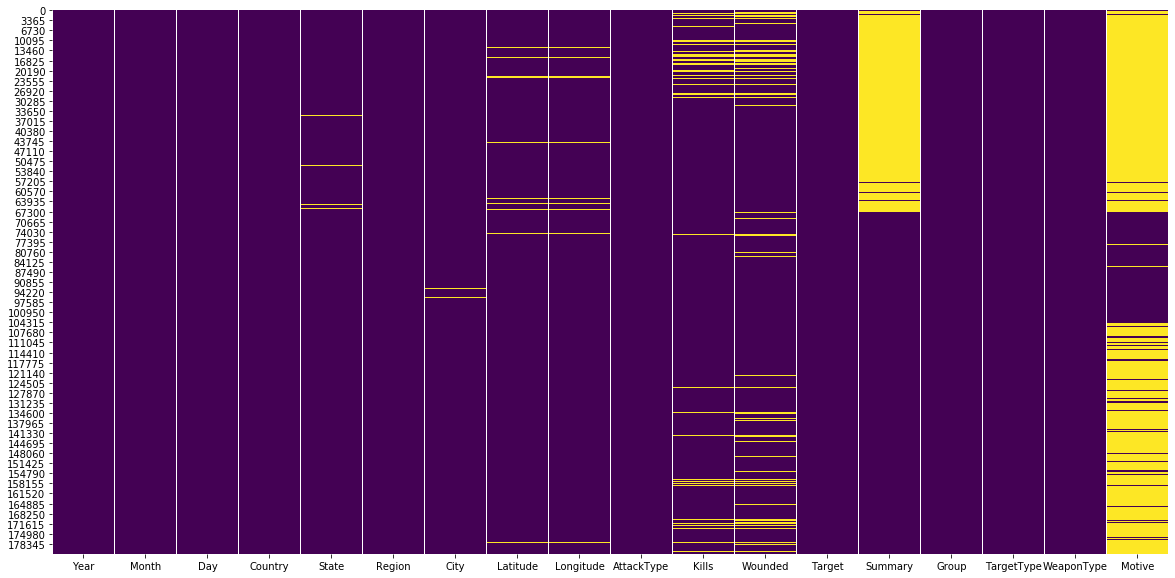

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(global_terrorism_df.isnull(), cbar = False, cmap='viridis')

From the above map, we can see now that after dropping few of the unnecessary columns there are only few NaN values in the data.

### Finding statistical values

In [13]:
global_terrorism_df.describe()

,Year,Month,Day,Latitude,Longitude,Kills,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


### Finding the correlation 

In [14]:
global_terrorism_df.corr()

,Year,Month,Day,Latitude,Longitude,Kills,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
Latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
Longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Kills,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


### Finding the covariance

In [15]:
global_terrorism_df.cov()

,Year,Month,Day,Latitude,Longitude,Kills,Wounded
Year,175.812496,0.006242,2.133346,40.951530,1.059590e+04,2.292652,7.019333
Month,0.006242,11.480600,0.164158,-1.005279,-2.692110e+03,0.135442,0.357870
Day,2.133346,0.164158,77.687385,0.559877,-4.120870e+03,-0.375477,-0.401569
Latitude,40.951530,-1.005279,0.559877,344.816764,5.564253e+03,-3.822593,10.634340
Longitude,10595.897714,-2692.109846,-4120.870170,5564.252921,4.193443e+10,-1358.855169,1740.424297
Kills,2.292652,0.135442,-0.375477,-3.822593,-1.358855e+03,133.304125,188.711482
Wounded,7.019333,0.357870,-0.401569,10.634340,1.740424e+03,188.711482,1292.358771


### Info. about the attacks

In [16]:
print("Country with the most attacks:",global_terrorism_df['Country'].value_counts().idxmax())
print("City with the most attacks:",global_terrorism_df['City'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",global_terrorism_df['Region'].value_counts().idxmax())
print("Year with the most attacks:",global_terrorism_df['Year'].value_counts().idxmax())
print("Month with the most attacks:",global_terrorism_df['Month'].value_counts().idxmax())
print("Group with the most attacks:",global_terrorism_df['Group'].value_counts().index[1])
print("Most Attack Types:",global_terrorism_df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


### Terrorist Activities by Region in each Year through Area Plot

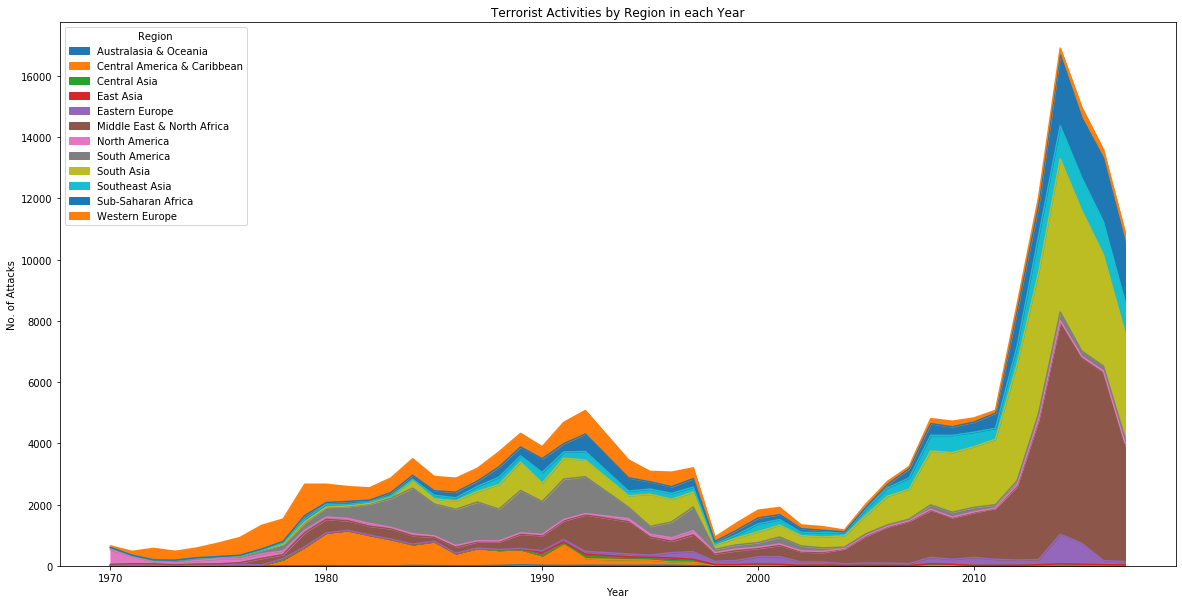

In [17]:
pd.crosstab(global_terrorism_df.Year, global_terrorism_df.Region).plot(kind='area',figsize=(20, 10))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('No. of Attacks')
plt.show()

### Number of Terrorist Activities each Year

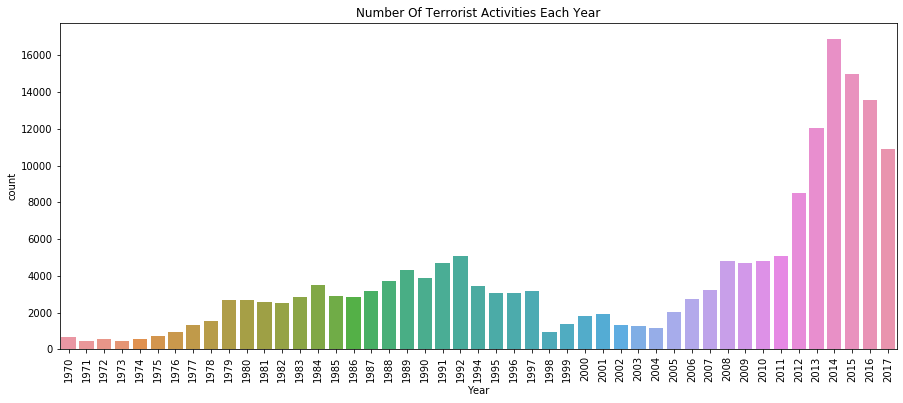

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot('Year', data = global_terrorism_df)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

### Filling empty values with 0

In [19]:
global_terrorism_df['Wounded'] =global_terrorism_df['Wounded'].fillna(0).astype(int)
global_terrorism_df['Kills'] = global_terrorism_df['Kills'].fillna(0).astype(int)
global_terrorism_df['casualities'] = global_terrorism_df['Kills'] + global_terrorism_df['Wounded']

### Attack Count

In [20]:
global_terrorism_df.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

### Top Countries affected by Terror Attacks

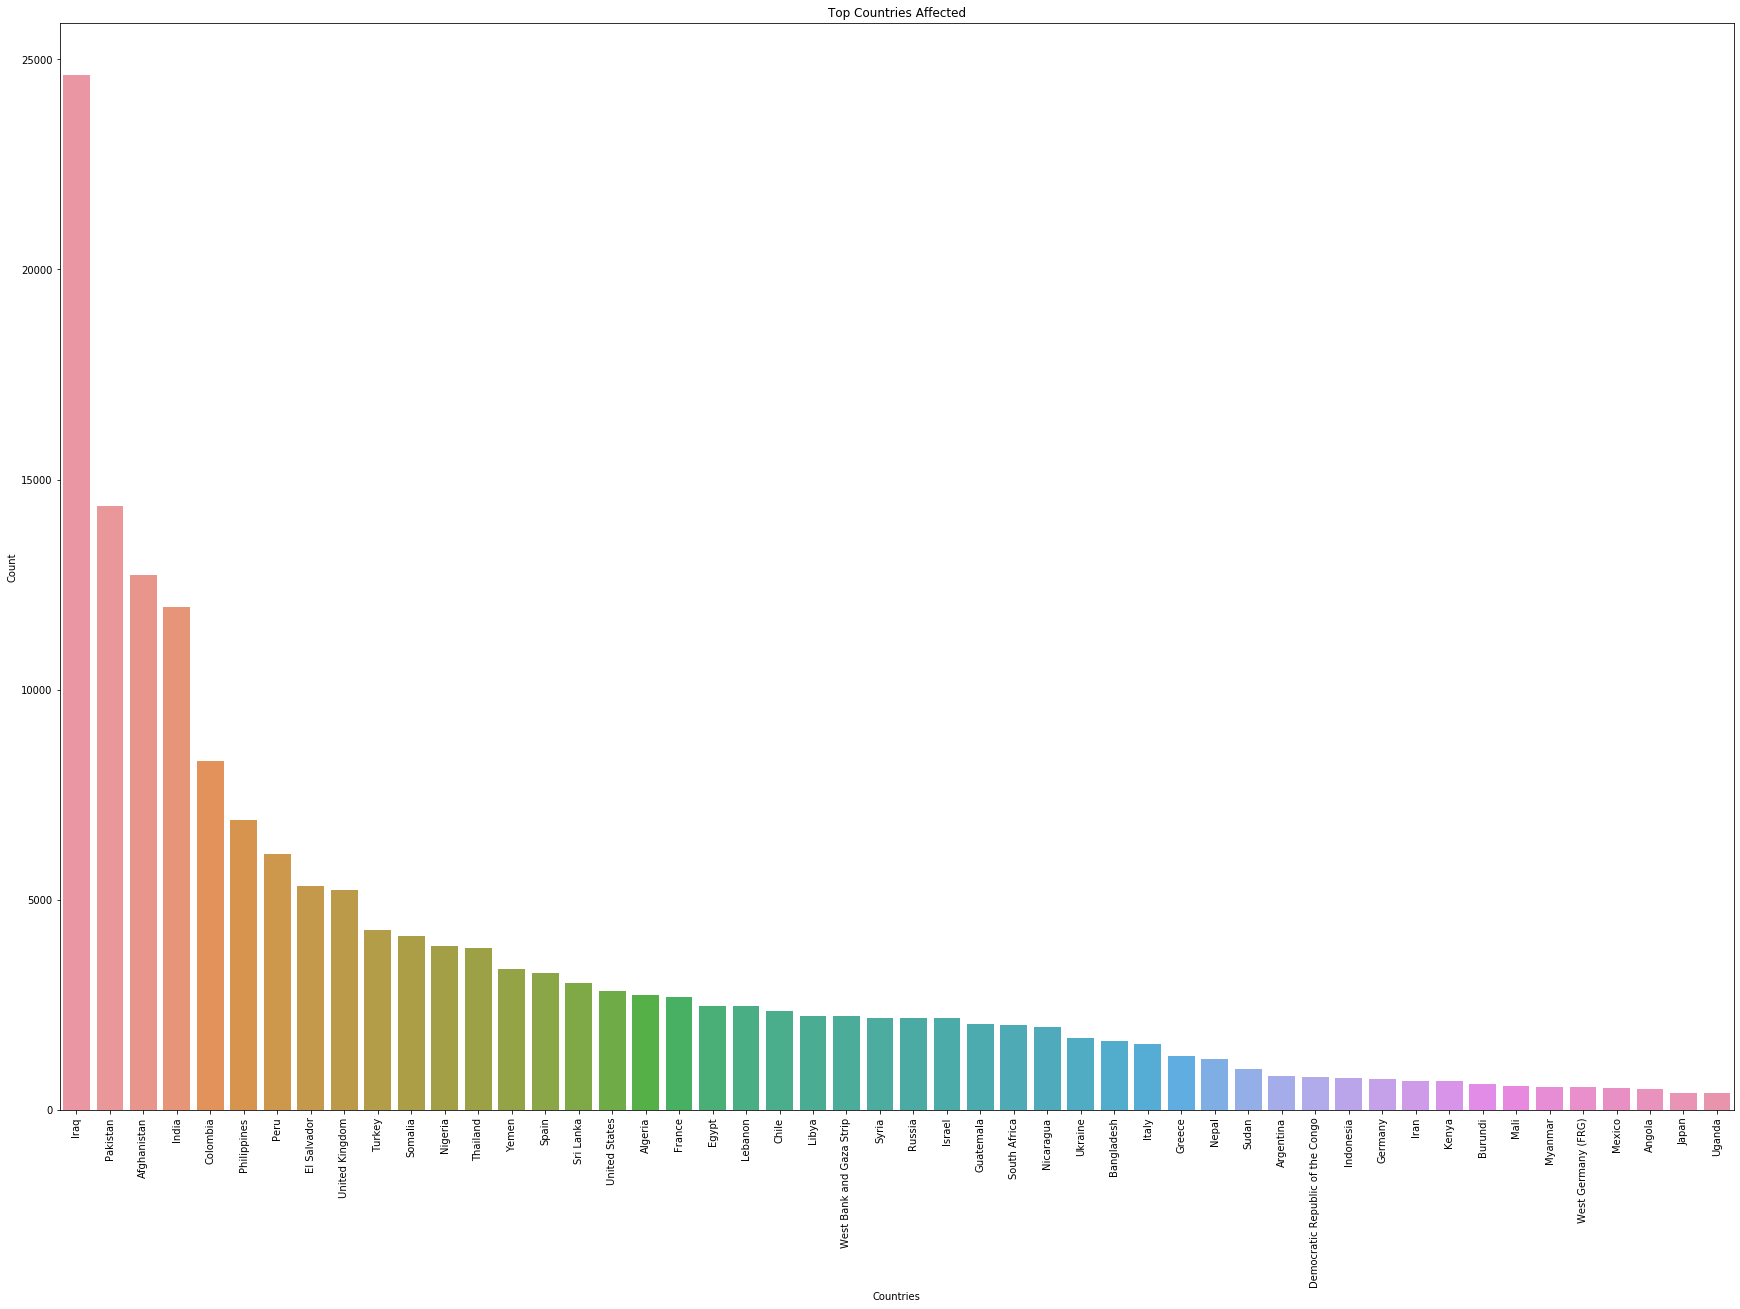

In [21]:
plt.subplots(figsize=(30,20))
sns.barplot(global_terrorism_df['Country'].value_counts()[:50].index,global_terrorism_df['Country'].value_counts()[:50])
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

### Methods of Attack

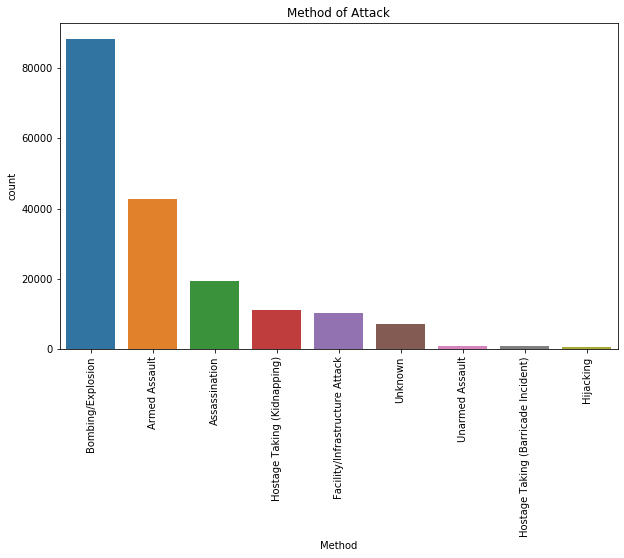

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(global_terrorism_df['AttackType'], data = global_terrorism_df, 
              order = global_terrorism_df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

### Attacks per Country 

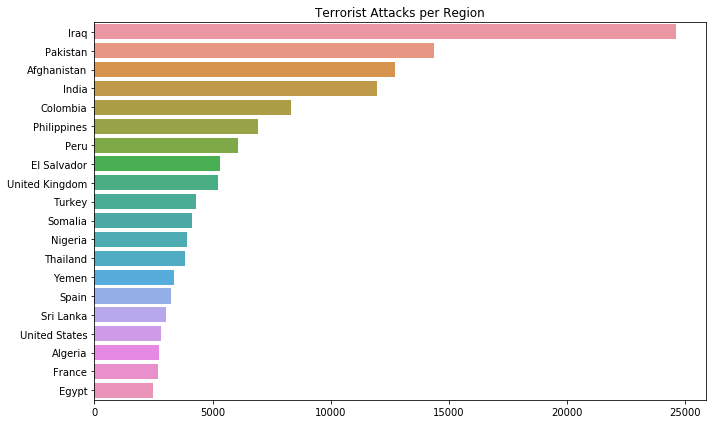

In [23]:
fig,axes = plt.subplots(figsize=(10,6))
sns.barplot(x=global_terrorism_df['Country'].value_counts()[:20].values, 
            y = global_terrorism_df['Country'].value_counts()[:20].index)
plt.title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

### Attacks per Region

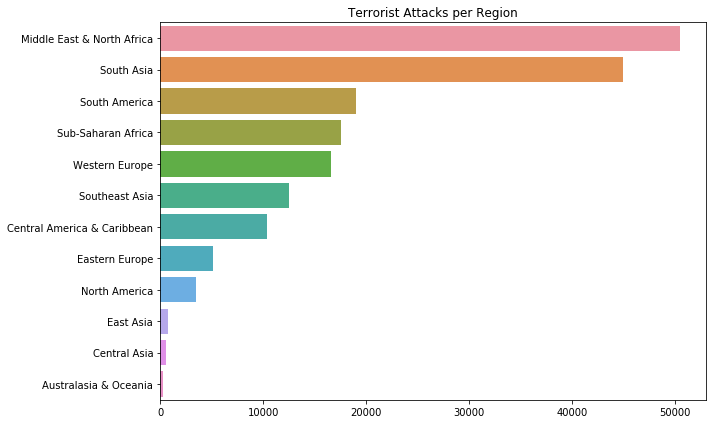

In [24]:
fig,axes = plt.subplots(figsize=(10,6))
sns.barplot(x=global_terrorism_df['Region'].value_counts().values,y=global_terrorism_df['Region'].value_counts().index)
plt.title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

### Most active organizations

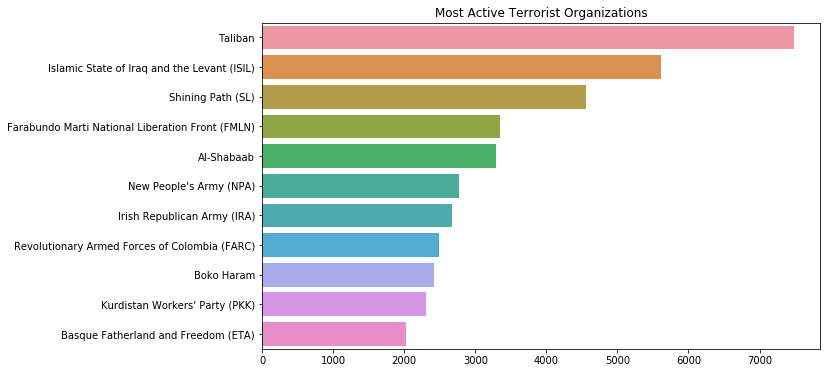

In [25]:
plt.subplots(figsize=(10,6))
sns.barplot(x = global_terrorism_df['Group'].value_counts()[1:12].values,
            y = global_terrorism_df['Group'].value_counts()[1:12].index)
plt.title('Most Active Terrorist Organizations')
plt.show()

### Most affected targets

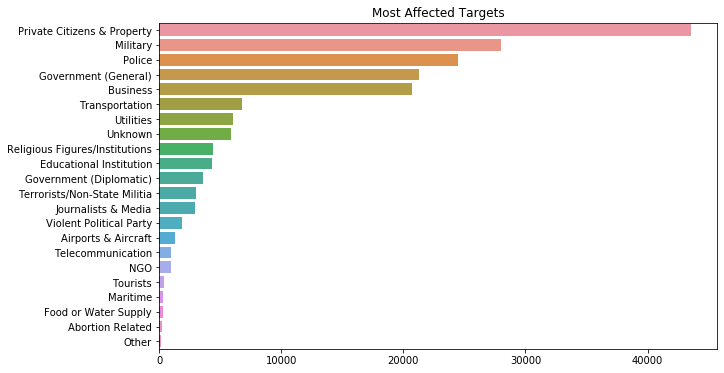

In [26]:
plt.subplots(figsize=(10,6))
sns.barplot(x = global_terrorism_df['TargetType'].value_counts().values, 
            y = global_terrorism_df['TargetType'].value_counts().index)
plt.title('Most Affected Targets')
plt.show()

### Comparing Attack Percentage (then and now)

In [27]:
Year = global_terrorism_df.Year.value_counts().to_dict()
rate =((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'attacks happened in 1970 & ',Year[2017],' attacks happened in 2017.')
print('So the number of attacks from 1970 has increased by ',np.round(rate,0),'% till 2017.')

651 attacks happened in 1970 &  10900  attacks happened in 2017.
So the number of attacks from 1970 has increased by  94.0 % till 2017.


### Countplot of Weapon Types

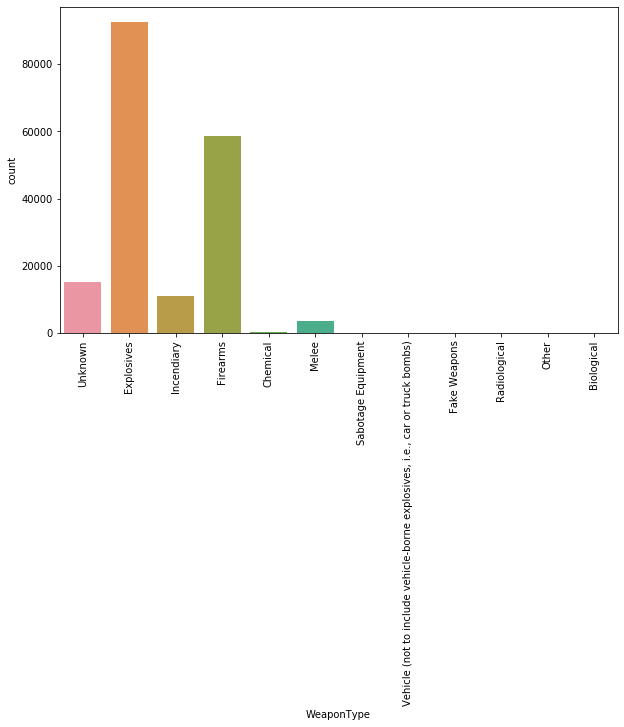

In [28]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='WeaponType', data = global_terrorism_df)

### Bar Graph of Attack Type with different Target Types

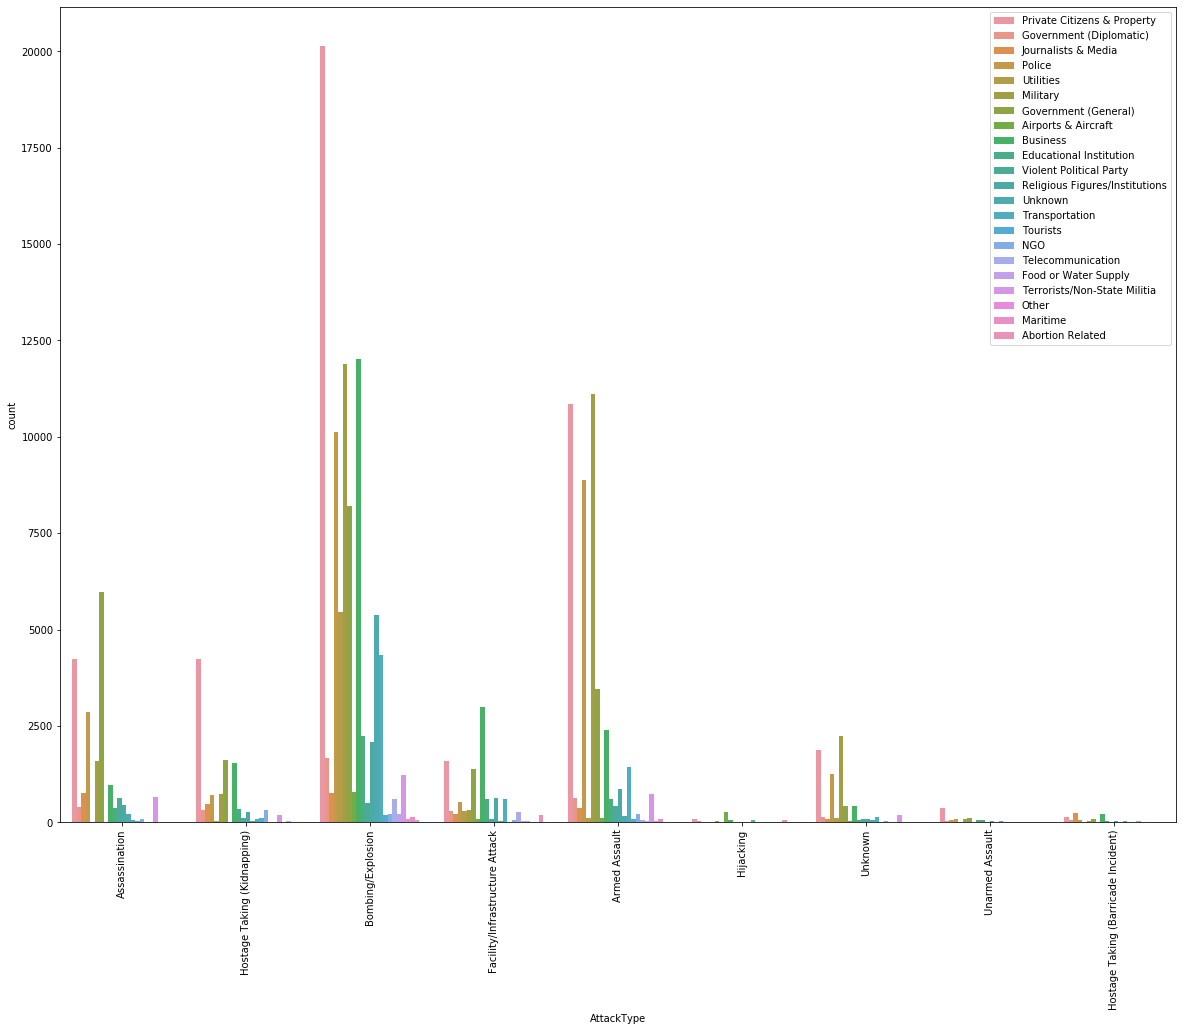

In [29]:
plt.figure(figsize=(20,15))
sns.countplot(x='AttackType', hue = 'TargetType' , data = global_terrorism_df)
plt.xticks(rotation=90)
plt.legend(loc='upper right')

### From the above plots following points are derived :

1.Attack type of Bombing/Explosive is more common on targets , mostly Private Citizens & Property type, people of Business type and people having millitary background have been targetted.

2.Attack type of Armed Assualt is second most common attack on people of Business type.

3.Attack type Assasinations are third most common attack on people having millitary background.

Also, it can be seen that there are huge number of weapons like Explosive and Incendiary are used. This affirms to the reported cases of attacks on the targets.

### Insights:
Taliban and ISIL has been most active organization.
Iraq is the most attacked country.
The Middle East and North Africa Region has been most targeted.
Maximum number of attacks are because of Bombing/Explosive.
There are maximum number of attacks on Private Citizens and Property.
After the declaration of war against terrorism, the number of attacks have increased.